Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1481.22it/s]


<MultiTrace: 1 chains, 1000 iterations, 3 variables>

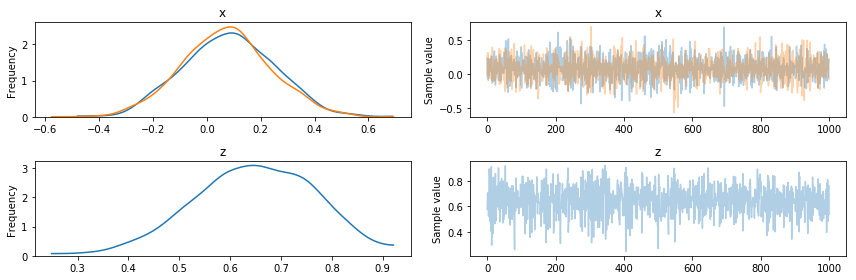

In [73]:
import pymc3 as pm
import numpy as np
import pandas as pd

# import pydevd
# pydevd.set_pm_excepthook()
np.seterr(invalid='raise')

data = np.random.normal(size=(2, 20))


with pm.Model() as model:
    x = pm.Normal('x', mu=.5, sd=2., shape=(2, 1))
    z = pm.Beta('z', alpha=10, beta=5.5)
    d = pm.Normal('data', mu=x, sd=.75, observed=data)


def run(n=1000):
    if n == "short":
        n = 50
    with model:
        trace = pm.sample(n)
#         print(pm.summary(trace))
#         print(trace[x].shape)
#         print(trace[z].shape)
#         print(trace[d].shape)
    pm.traceplot(trace, varnames=['x', 'z'])
    df = pm.backends.tracetab.trace_to_dataframe(trace)
#     return df
    return trace, df

# if __name__ == '__main__':
trace, df = run(1000)

trace
# df

In [74]:
import tensorflow as tf
import pymc3 as pm
# from pymc3 import Model

class CustomModel():
    def __init__(self, name='customModel'):
#         super(CustomModel, self).__init__()
        self.x = tf.distributions.Normal(loc=.5, scale=2., )
        self.z = tf.distributions.Beta(concentration1=10., # alpha
                                       concentration0=5.5, # beta
                                      )
#         self.d = tf.distributions.Normal(loc=x, scale=.75)
        self.n = tf.placeholder(name="n", dtype= tf.int32, shape=())
        self.x_sample = self.x.sample([self.n, 2, 1])
        self.z_sample = self.x.sample([self.n, ])
        self.init = tf.global_variables_initializer()
#         self.sample()
    def sample(self, n_):
        
        sess = tf.Session()
        with sess.as_default():
            self.init.run()


            x, z = self.x_sample.eval(feed_dict={
                                   self.n : n_,
                                }
                            ), \
                    self.z_sample.eval(feed_dict={
                                   self.n : n_,
                                }
                            ) 
        sess.close()
        
        return x, z
        
    
        

(2, 1000)


/home/sharan/anaconda3/envs/pymc4/lib/python3.6/site-packages/pymc3/backends/base.py:374: UserWarning: The lenght of the values you are trying to add (2) does not match the number (1000) of total samples in the trace (chains * iterations)
  "(chains * iterations)".format(l_v, l_samples))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd357486e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd38560efd0>]], dtype=object)

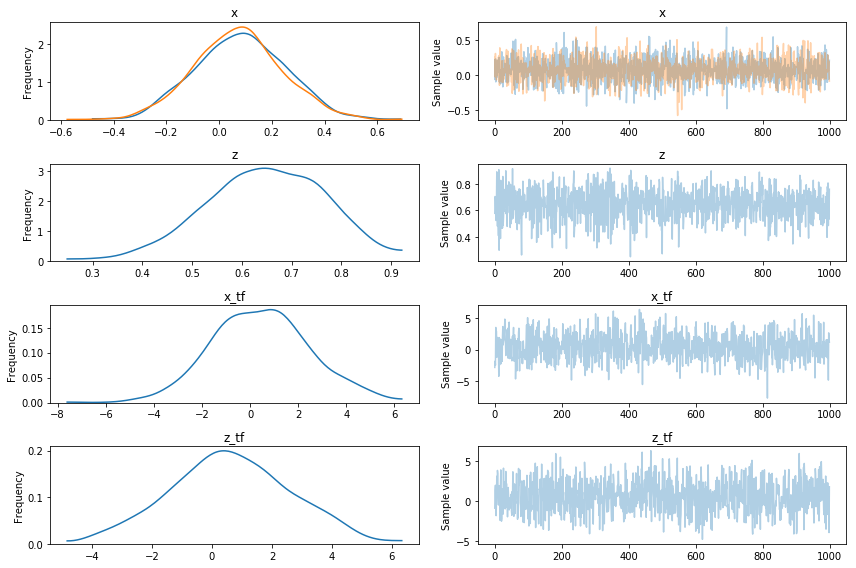

In [75]:
model = CustomModel()
x, z = model.sample(1000)
# trace = pm.backends.base.MultiTrace
# x = np.asarray(x).reshape(50*(draw-ntune), ndim, -1).squeeze()
x = np.asarray(x).reshape(1, 2, 1000).squeeze()
print(x.shape)
trace.add_values(vals=dict(x_tf=x, z_tf=z))
pm.traceplot(trace)
# pm.backends.tracetab.trace_to_dataframe(trace)

In [78]:
trace['x_tf'].shape

(2000,)